In [3]:
import os
import numpy as np
from parse import parse
import matplotlib.pyplot as plt

## Read true data

In [4]:
mapfile = os.path.join('..', 'Documentation', 'Maps', 'TrueMap1')
truemap = []
with open(mapfile, 'r') as f:
    for _ in range(5):
        f.readline()
    for l in f:
        l = " ".join(l)
        l = l.replace('.', '0')
        l = l.replace('#', '63')
        l = l.replace('/', '0')
        l = l.replace('-', '0')
        l = l.replace('|', '0')
        l = l.replace('\\', '0')
        truemap.append(np.array(l.split(), dtype=np.int32))
truemap = np.array(truemap)
truemap

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 63, 63, 63, 63, 63,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 63, 63, 63, 63, 63,  0,  0,  0,  0,  0,  0,  0,  0,
        63, 63, 63,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 63, 63, 63, 63, 63,  0,  0,  0,  0,  0,  0,  0,  0,
        63, 63, 63,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

## Read data in

In [5]:
datapath = os.path.join('..', 'data')
datafolders = os.listdir(datapath)

In [32]:

currdatapath = os.path.join(datapath, datafolders[3]) # <- just read in one set
datafiles = os.listdir(currdatapath)
mapfile = os.path.join(currdatapath, 'map.map')

times = []
mapstime = []
with open(mapfile, 'r') as file:
    for line in file:
        if 'Map' in line:
            mapname, h, m, s = parse('{}-{}-{}-{}', line)
            if mapname == 'HumanMap':
                continue
            times.append((h , m, s))
            readsuccess = True
            mp = []
            for i in range(25):
                matline = file.readline()
                matline = matline.replace('!', '-')
                try:
                    mp.append(np.array(matline.split(), dtype=np.int32))
                except ValueError:
                    readsuccess = False
            if readsuccess:
                mp = np.array(mp)
                mapstime.append(mp)
mapstime = np.array(mapstime)[1:]

In [33]:
mapstime.shape

(25, 25, 25)

## Plot the maps

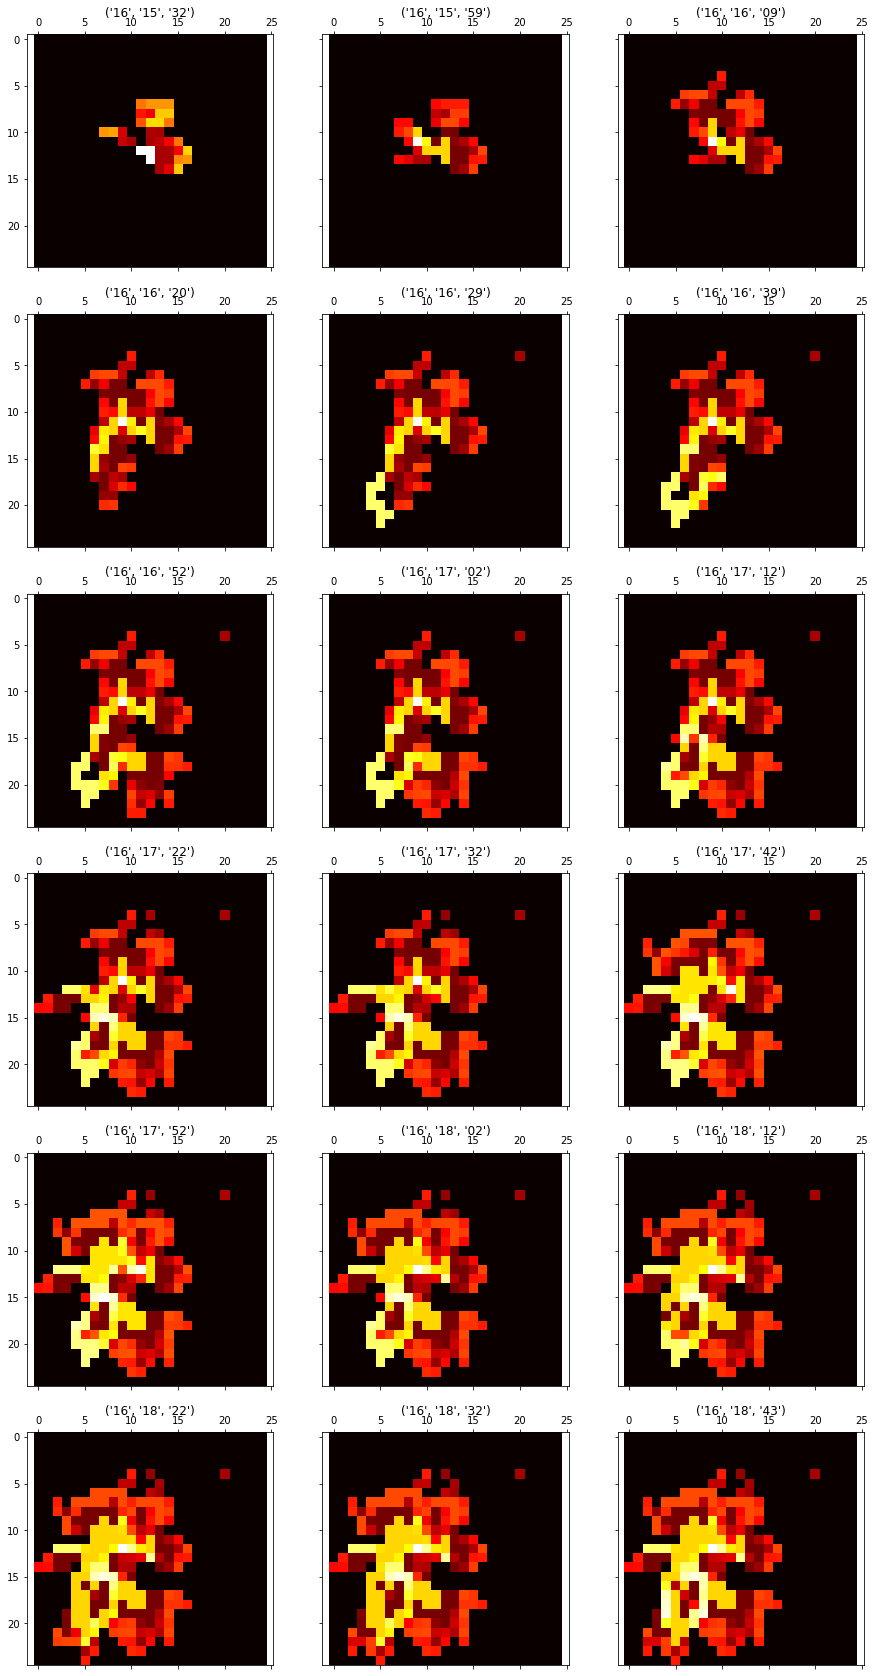

In [34]:
fig, ax = plt.subplots(6,3 , sharex='col', sharey='row', figsize=(15, 30))
for i in range(6):
    for j in range(3):
        try:
            ax[i, j].set_title(str(times[i*3 + j]))
            ax[i, j].matshow(mapstime[i*3 + j], cmap='hot', interpolation='none')
        except IndexError:
            continue
plt.show()

## Compute Metrics

### Coverage

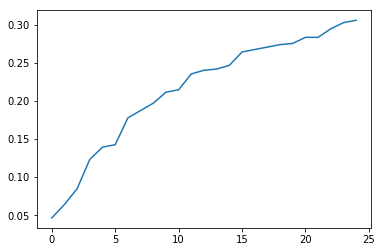

In [35]:
def coverage(mapstime):
    tmp = mapstime.copy()
    res = []
    for tmp in mapstime.copy():
        map_size = tmp.size
        covered = tmp[tmp > 0].shape[0]
        res.append(covered/map_size)
    return np.array(res)
plt.figure()
plt.plot(coverage(mapstime))
plt.show()


### Coverage Accuracy on Visible locations

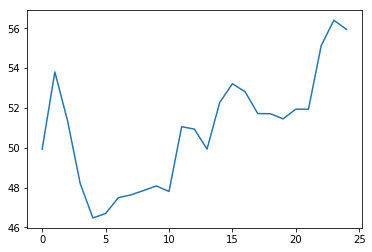

In [113]:
def coverage_accuracy(mapstime, truemap):
    tmp = mapstime.copy()
    res = []
    for tmp in mapstime:
        tmp[tmp > 100] -= 100
        seen_locs = np.where(tmp > 0)
        diff = tmp[seen_locs] - truemap[seen_locs]
        rmse = np.sqrt(np.mean(diff * diff))
        res.append(rmse)
    return np.array(res)
plt.figure()
plt.plot(coverage_accuract(mapstime, truemap))
plt.show()

# Bulk Analyse Data

In [38]:
os.listdir(datapath)

['expr1-Belief_Human_Readable-2019-04-18_15-47',
 'expr1-Belief_Human_Readable-2019-04-18_15-53',
 'expr1-Belief_Human_Readable-2019-04-18_16-07',
 'expr1-Belief_Human_Readable-2019-04-18_16-15',
 'expr1-Belief_Human_Readable-2019-04-18_16-20',
 'expr1-Belief_Human_Readable-2019-04-18_17-26',
 'expr1-Non_Belief-2019-04-18_16-32',
 'expr1-Non_Belief-2019-04-18_16-37',
 'expr1-Non_Belief-2019-04-18_16-50',
 'expr1-Non_Belief-2019-04-18_17-11',
 'expr1-Non_Belief-2019-04-18_17-16']

In [110]:
def readInMap(mapfile):
    times = []
    mapstime = []
    with open(mapfile, 'r') as file:
        for line in file:
            if 'Map' in line:
                mapname, h, m, s = parse('{}-{}-{}-{}', line)
                times.append((h , m, s))
                if mapname == 'HumanMap':
                    readsuccess = True
                    mp = []
                    for i in range(25):
                        matline = file.readline()
                        matline = matline.replace('.', '0').replace('O','63').replace('*', '0').replace('L', '0')
                        matline = matline.split()
                        if len(matline) == 25:
                            matline = np.array(matline, dtype=np.int32)
                            mp.append(matline)
                        else:
                            readsuccess = False
                    mp = np.array(mp)
                    if readsuccess:
                        mapstime.append(mp)
                else:
                    readsuccess = True
                    mp = []
                    for i in range(25):
                        matline = file.readline()
                        matline = matline.replace('!', '-').replace('\\x0','')
                        matline = matline.split()
                        if len(matline) == 25:
                            matline = np.array(matline, dtype=np.int32)
                            mp.append(matline)
                        else:
                            readsuccess = False
                    mp = np.array(mp)
                    if readsuccess:
                        mapstime.append(mp)
    return np.array(mapstime)
    

def calculateMetricOneSet(datapath, datafoldername, truemap):
    currdatapath = os.path.join(datapath, datafoldername) # <- just read in one set
    datafiles = os.listdir(currdatapath)
    mapfile = os.path.join(currdatapath, 'map.map')
    mapstime = readInMap(mapfile)
    cov = coverage(mapstime)[-1]
    rmse = coverage_accuracy(mapstime, truemap)[-1]
    return (cov, rmse)

calculateMetricOneSet(datapath, os.listdir(datapath)[10], truemap)

(0.081600000000000006, 57.848178577254117)

In [111]:
def calculateMetrics(datapath, dataset_tag, truemap):
    dirs = [d for d in os.listdir(datapath) if dataset_tag in d]
    covs = []
    accs = []
    for d in dirs:
        c, a = calculateMetricOneSet(datapath, d, truemap)
        covs.append(c)
        accs.append(a)
    mean_covs = np.mean(covs)
    mean_accs = np.mean(accs)
    return(mean_covs, mean_accs)

In [112]:
print(calculateMetrics(datapath, 'Human_Readable',truemap))
print(calculateMetrics(datapath, 'Non_Belief',truemap))

(0.21253333333333332, 55.319609870967177)
(0.10400000000000001, 58.898807157139387)


# Plotting a route
For Belief Map Run

In [162]:
from scipy.interpolate import RegularGridInterpolator

resized_truemapp = np.zeros((1800, 1800))
stride_x = int(1800/25)
for i in range(25):
    for j in range(25):
        resized_truemapp[i*stride_x:(i+1)*stride_x, j*stride_x:(j+1)*stride_x] = truemap[i, j]


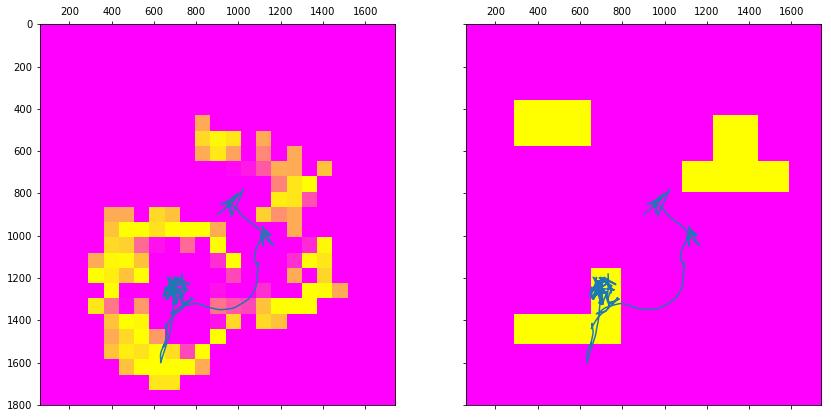

In [164]:
datafoldername = os.listdir(datapath)[5] # <- The file that includes the pose values
currdatapath = os.path.join(datapath, datafoldername) # <- just read in one set
datafiles = os.listdir(currdatapath)
datfile = os.path.join(currdatapath, 'dat.data')

positions = []
with open(datfile) as f:
    for line in f:
        if 'Pose' in line:
            x, y, h = parse('Pose: X: {} Y: {} H: {}', line)
            positions.append(np.array([x, y, h], dtype=np.float32))
positions = np.array(positions)
positions.shape

mapstime = readInMap(os.path.join(currdatapath, 'map.map'))
mapp = mapstime[-1]
mapp[mapp < 0] = 0
mapp[mapp >= 100] -= 100

newmapp = np.zeros((1800, 1800))
stride_x = int(1800/25)
for i in range(25):
    for j in range(25):
        newmapp[i*stride_x:(i+1)*stride_x, j*stride_x:(j+1)*stride_x] = mapp[i, j]
        

fig, ax = plt.subplots(1, 2 , sharex='col', sharey='row', figsize=(14, 7))
ax[0].matshow(newmapp, cmap='spring', interpolation='none')
ax[0].plot(positions[:, 0], positions[:, 1])
ax[1].matshow(resized_truemapp, cmap='spring', interpolation='none')
ax[1].plot(positions[:, 0], positions[:, 1])
plt.show()

For Non-Belief map run

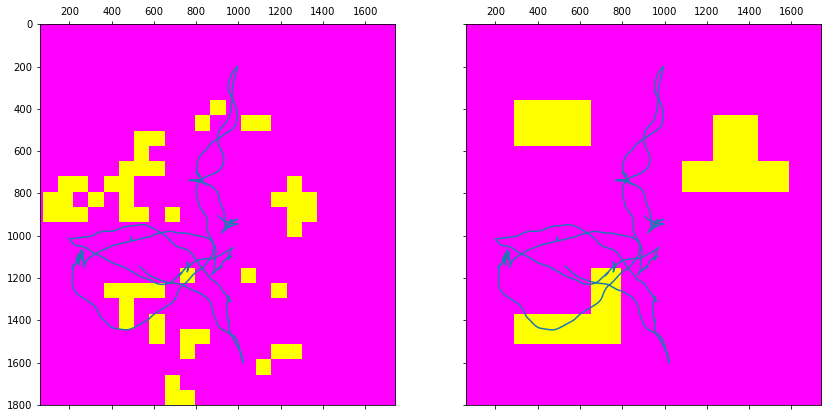

In [169]:
datafoldername = os.listdir(datapath)[10] # <- The file that includes the pose values
currdatapath = os.path.join(datapath, datafoldername) # <- just read in one set
datafiles = os.listdir(currdatapath)
datfile = os.path.join(currdatapath, 'dat.data')

positions = []
with open(datfile) as f:
    for line in f:
        if 'Pose' in line:
            x, y, h = parse('Pose: X: {} Y: {} H: {}', line)
            positions.append(np.array([x, y, h], dtype=np.float32))
positions = np.array(positions)
positions.shape

mapstime = readInMap(os.path.join(currdatapath, 'map.map'))
mapp = mapstime[-1]
mapp[mapp < 0] = 0
mapp[mapp >= 100] -= 100

newmapp = np.zeros((1800, 1800))
stride_x = int(1800/25)
for i in range(25):
    for j in range(25):
        newmapp[i*stride_x:(i+1)*stride_x, j*stride_x:(j+1)*stride_x] = mapp[i, j]
        

fig, ax = plt.subplots(1, 2 , sharex='col', sharey='row', figsize=(14, 7))
ax[0].matshow(newmapp, cmap='spring', interpolation='none')
ax[0].plot(positions[:, 0], positions[:, 1])
ax[1].matshow(resized_truemapp, cmap='spring', interpolation='none')
ax[1].plot(positions[:, 0], positions[:, 1])
plt.show()